# Import Libraries, Dataset loading, Cells should be in row, Selected genes should be in coloumn.

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import leidenalg
adata1=sc.read_csv('tsallisd.csv',delimiter=',', first_column_names=None, dtype='float32')

# Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.


In [ ]:
sc.tl.pca(adata1, svd_solver='arpack')

# Plot the variance ratio of pcs

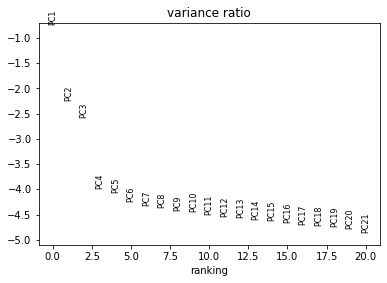

In [10]:
 
sc.pl.pca_variance_ratio(adata1,n_pcs=20,log=True,save="pc_cbmc.svg")

# Create Neighborhood Graph using 10 pcs, Dimension reduction using umap, Leiden clustering, Visualizing clusters

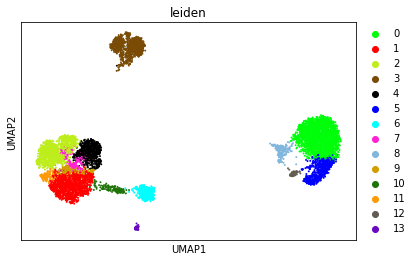

In [11]:
sc.pp.neighbors(adata1, n_neighbors=30, n_pcs=10)
sc.tl.umap(adata1)
sc.tl.leiden(adata1)
sc.pl.umap(adata1, color=['leiden'],save="umap_cbmc.svg")

# Compute a ranking for the highly differential genes in each cluster

/export/scratch1/home/sumanta/anaconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


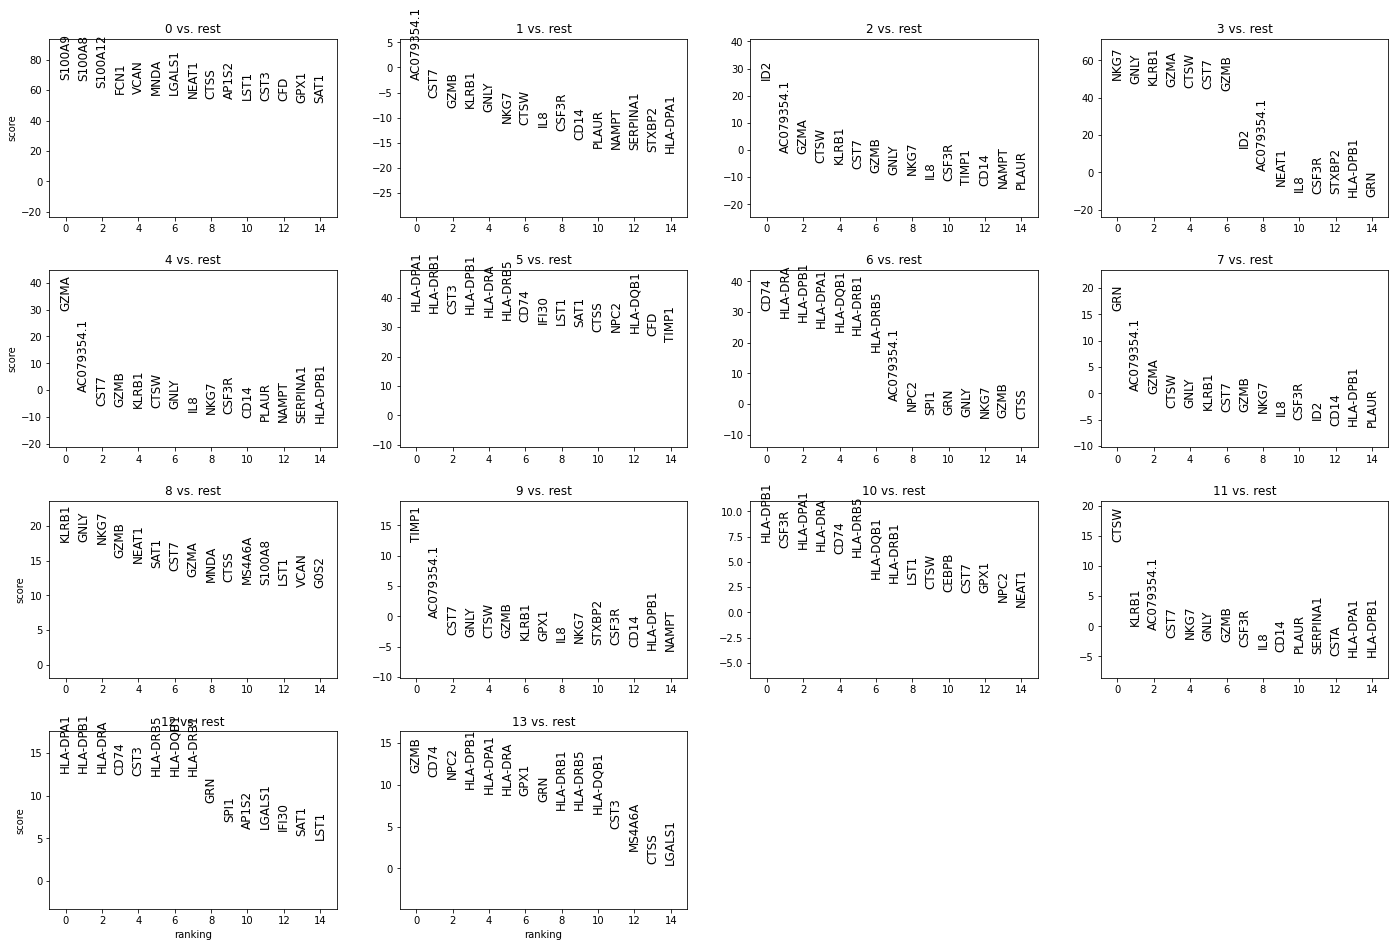

In [12]:
sc.tl.rank_genes_groups(adata1, 'leiden', method='wilcoxon',key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata1, n_genes=15, sharey=False,key="wilcoxon",fontsize=12,save="degenes_cbmc.svg")

# Top 10 DE genes for each cluster using Wilcox-Ranksum Test

In [13]:
result = adata1.uns['wilcoxon']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,9_n,9_p,10_n,10_p,11_n,11_p,12_n,12_p,13_n,13_p
0,S100A9,0.0,AC079354.1,1.200471e-02,ID2,2.371097e-146,NKG7,0.000000e+00,GZMA,5.090242e-192,...,TIMP1,4.343665e-35,HLA-DPB1,2.327360e-12,CTSW,4.151440e-45,HLA-DPA1,3.332230e-37,GZMB,1.317818e-30
1,S100A8,0.0,CST7,1.821654e-09,AC079354.1,3.392184e-01,GNLY,0.000000e+00,AC079354.1,6.336153e-01,...,AC079354.1,8.063504e-01,CSF3R,1.961852e-10,KLRB1,9.134818e-01,HLA-DPB1,5.387266e-37,CD74,4.746831e-28
2,S100A12,0.0,GZMB,9.304741e-16,GZMA,1.207210e-01,KLRB1,0.000000e+00,CST7,9.081980e-09,...,CST7,3.323092e-03,HLA-DPA1,3.287647e-10,AC079354.1,5.799827e-01,HLA-DRA,1.271630e-36,NPC2,5.873060e-27
3,FCN1,0.0,KLRB1,7.791244e-16,CTSW,1.518210e-06,GZMA,0.000000e+00,GZMB,3.035383e-10,...,GNLY,8.881708e-04,HLA-DRA,8.920450e-10,CST7,6.342277e-02,CD74,1.811533e-35,HLA-DPB1,2.654981e-21
4,VCAN,0.0,GNLY,9.710103e-19,KLRB1,4.797102e-07,CTSW,0.000000e+00,KLRB1,1.568283e-10,...,CTSW,5.020971e-04,CD74,8.372844e-09,NKG7,3.785720e-02,CST3,3.304484e-35,HLA-DPA1,4.246190e-19
5,MNDA,0.0,NKG7,1.381555e-28,CST7,8.694531e-12,CST7,0.000000e+00,CTSW,2.956825e-11,...,GZMB,4.329444e-04,HLA-DRB5,4.600345e-08,GNLY,1.310359e-02,HLA-DRB5,3.437874e-35,HLA-DRA,1.110430e-18
6,LGALS1,0.0,CTSW,5.516577e-30,GZMB,2.152991e-16,GZMB,0.000000e+00,GNLY,7.449586e-12,...,KLRB1,1.484671e-04,HLA-DQB1,9.214244e-04,GZMB,8.932353e-03,HLA-DQB1,4.167833e-35,GPX1,5.515599e-18
7,NEAT1,0.0,IL8,8.371021e-32,GNLY,1.315685e-19,ID2,4.846907e-41,IL8,2.252435e-16,...,GPX1,5.706607e-05,HLA-DRB1,3.351370e-03,CSF3R,7.545450e-04,HLA-DRB1,5.179888e-35,GRN,1.458094e-15
8,CTSS,0.0,CSF3R,4.208639e-36,NKG7,3.323923e-20,AC079354.1,3.354972e-01,NKG7,1.070984e-18,...,IL8,3.737349e-05,LST1,4.640659e-03,IL8,1.848214e-04,GRN,2.974649e-20,HLA-DRB1,1.612975e-12
9,AP1S2,0.0,CD14,2.128878e-47,IL8,4.761918e-26,NEAT1,3.224862e-13,CSF3R,4.769179e-19,...,NKG7,2.110560e-05,CTSW,2.038881e-02,CD14,2.780794e-05,SPI1,4.247126e-12,HLA-DRB5,1.748484e-12


# Save the results in a table

In [14]:
p=pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)
pd.DataFrame(p).to_csv("cbmc_marker.csv")

# Manually set the color of clusters as original data cell types

In [8]:
adata1.uns['leiden_colors']=["#00fe0a", "#ff0000", "#bded1b", "#794b05", "#000000", "#0000ff", "#00ffff", "#ff21d3",
"#81b7dd", "#d19d00", "#1e7309", "#fc9a07", "#625b51", "#6a09c3"]


# Visualizing top 5 DE genes for each cluster in a heatmap using wilcox results

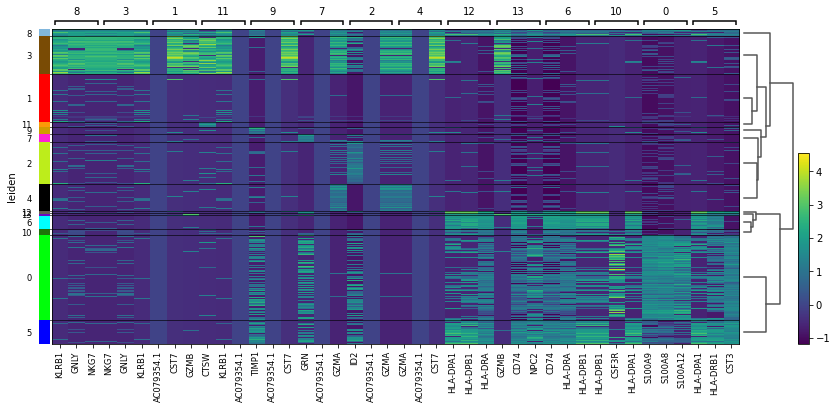

In [19]:

sc.pl.rank_genes_groups_heatmap(adata1, n_genes=3, key="wilcoxon", groupby="leiden", show_gene_labels=True, save="heatmap_cbmc.svg")

# Visualizing top 5 DE genes for each cluster in a dotplot using t-test results. Here color of dot represents mean expression of the gene in those cell, dot size represents fraction of cells expressing a gene.  

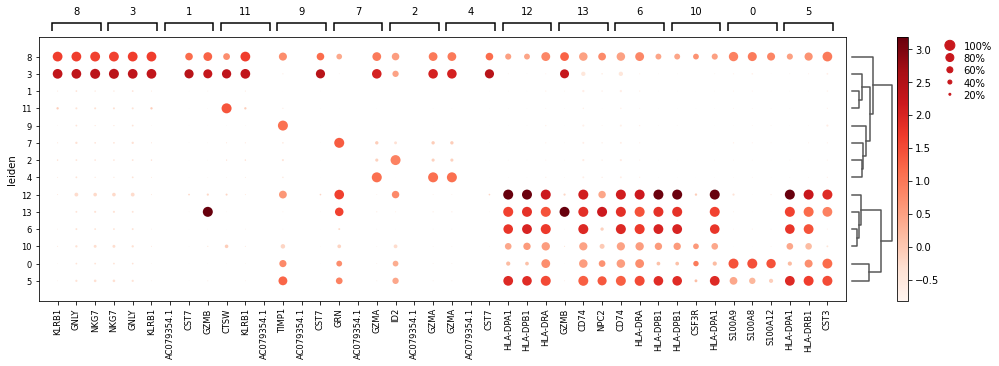

In [18]:
sc.pl.rank_genes_groups_dotplot(adata1, n_genes=3, key="wilcoxon", groupby="leiden",save="dotplot_cbmc.svg")

# Visualizing top 5 DE genes for each cluster in a stacked violin plot using wilcox results

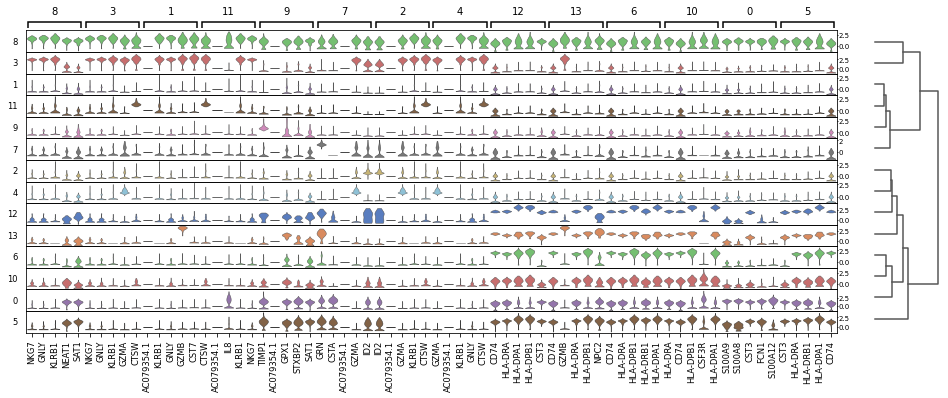

In [45]:
sc.pl.rank_genes_groups_stacked_violin(adata1, n_genes=5, key="t-test", groupby="leiden")

# Visualizing top 5 DE genes for each cluster in a matrixplot using wilcox results. Matrixplot represents mean expression (%) of a gene in a cluster as a heatmap.

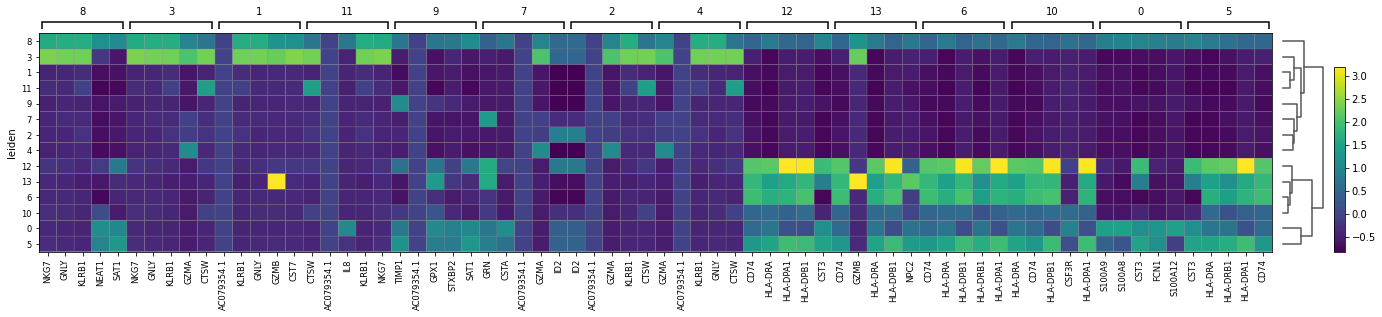

In [55]:
sc.pl.rank_genes_groups_matrixplot(adata1, n_genes=5, key="t-test", groupby="leiden")

# Showing expression of some marker genes (e.g GZMA) across Leiden groups

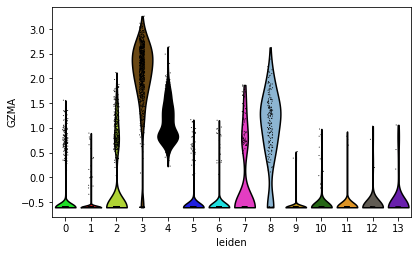

In [23]:
 sc.pl.violin(adata1, ['GZMA'], groupby='leiden',save="gzma_cbmc.svg")